In [24]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg

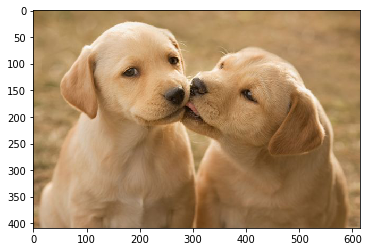

In [25]:
# read the image

image_original = mpimg.imread(r'../images/dogs.jpg')
image = image_original.copy() # else it is read only

# display original

plt.imshow(image_original, cmap='gray')

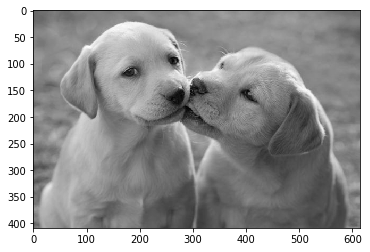

In [26]:
# convert to gray

# converting to grayscale: avg method

R = image[:,:, 0]
G = image[:,:, 1]
B = image[:,:, 2]

grayscale = (R/3 + G/3 + B/3)

plt.imshow(grayscale, cmap='gray')



In [27]:
# histogram

freq = [0 for i in range(256)]

for i in range(grayscale.shape[0]):
    for j in range(grayscale.shape[1]):
        index = int(grayscale[i, j])
        freq[index] = freq[index] + 1

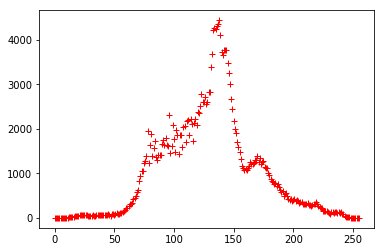

In [28]:
# original histogram

plt.plot([i for i in range(256)], freq, 'r+')

In [29]:
# histogram equilisation

# freq -> frequency of each gray level
# cSum -> cummulative sum

cSum = [0 for i in range(256)]

cSum[0] = freq[0]
for i in range(1, 256):
    cSum[i] = freq[i] + cSum[i-1]

In [30]:
# testing cummulative sum

print(cSum[255], grayscale.shape[0]*grayscale.shape[1])

251535 251535


In [31]:
# norm -> normalised cSum = cSum / cSum[255] * 255

norm = [round((i/cSum[255]) * 255) for i in cSum]


In [32]:
print(norm)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 7, 8, 8, 9, 10, 11, 13, 14, 15, 17, 19, 20, 22, 24, 25, 27, 28, 30, 31, 33, 34, 36, 37, 39, 41, 43, 44, 47, 48, 50, 52, 54, 55, 57, 59, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 89, 91, 93, 95, 98, 101, 103, 106, 109, 111, 114, 117, 120, 123, 127, 131, 136, 140, 144, 149, 153, 157, 161, 165, 169, 172, 176, 180, 183, 186, 189, 191, 194, 196, 197, 199, 201, 202, 204, 205, 206, 207, 208, 209, 210, 212, 213, 214, 215, 217, 218, 219, 221, 222, 223, 224, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 237, 238, 239, 239, 240, 241, 241, 242, 242, 243, 243, 244, 244, 244, 245, 245, 246, 246, 246, 247, 247, 248, 248, 248, 248, 249, 249, 249, 250, 250, 250, 251, 251, 251, 252, 252, 252, 252, 253, 253, 253, 253, 253, 253, 253, 254, 254, 254, 254, 254, 254, 254, 254, 

In [33]:
normalised_hist = [0 for i in  range(256)]

In [34]:
for i in range(256):
    noramlised_gl = norm[i]
    normalised_hist[noramlised_gl] = normalised_hist[noramlised_gl] + freq[i]

Text(0.5, 1.0, 'original histogram')

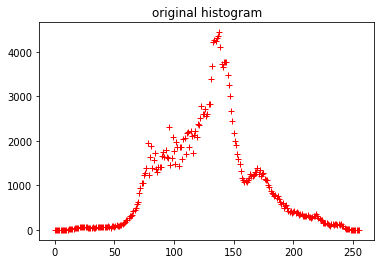

In [35]:
plt.plot([i for i in range(256)], freq, 'r+')
plt.title('original histogram')

Text(0.5, 1.0, 'normalised histogram')

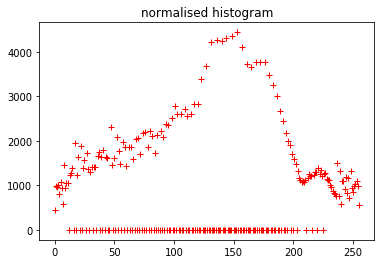

In [36]:
plt.plot([i for i in range(256)], normalised_hist, 'r+')
plt.title('normalised histogram')

In [37]:
# reconstructing the image

reconstructed = np.zeros(grayscale.shape)

for i in range(grayscale.shape[0]):
    for j in range(grayscale.shape[1]):
        index = int(grayscale[i, j])
        reconstructed[i, j] = norm[index]

Text(0.5, 1.0, 'original')

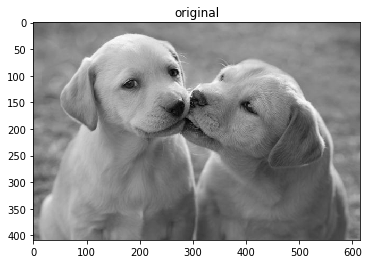

In [38]:
plt.imshow(grayscale, cmap='gray')
plt.title('original')

Text(0.5, 1.0, 'reconstructed')

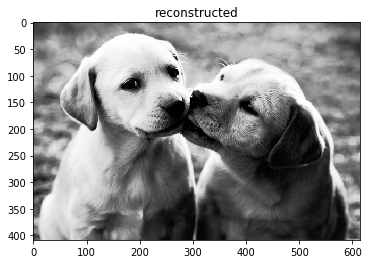

In [39]:
plt.imshow(reconstructed, cmap='gray')
plt.title('reconstructed')

NameError: name 'readImage' is not defined